In [110]:
library (tidyverse)
library (repr)
library (infer)
library (broom)
library (GGally)

In [111]:
flight_data <- read_csv("delta_flights.csv")

New names:
• `` -> `...1`
Rows: 5000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT
dbl (12): ...1, replicate, MONTH, DAY, DAY_OF_WEEK, SCHEDULED_DEPARTURE, DEP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [112]:
flight_data <- flight_data[complete.cases(flight_data), ]

flight_data <- flight_data %>%
select(-...1,- replicate,-AIRLINE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



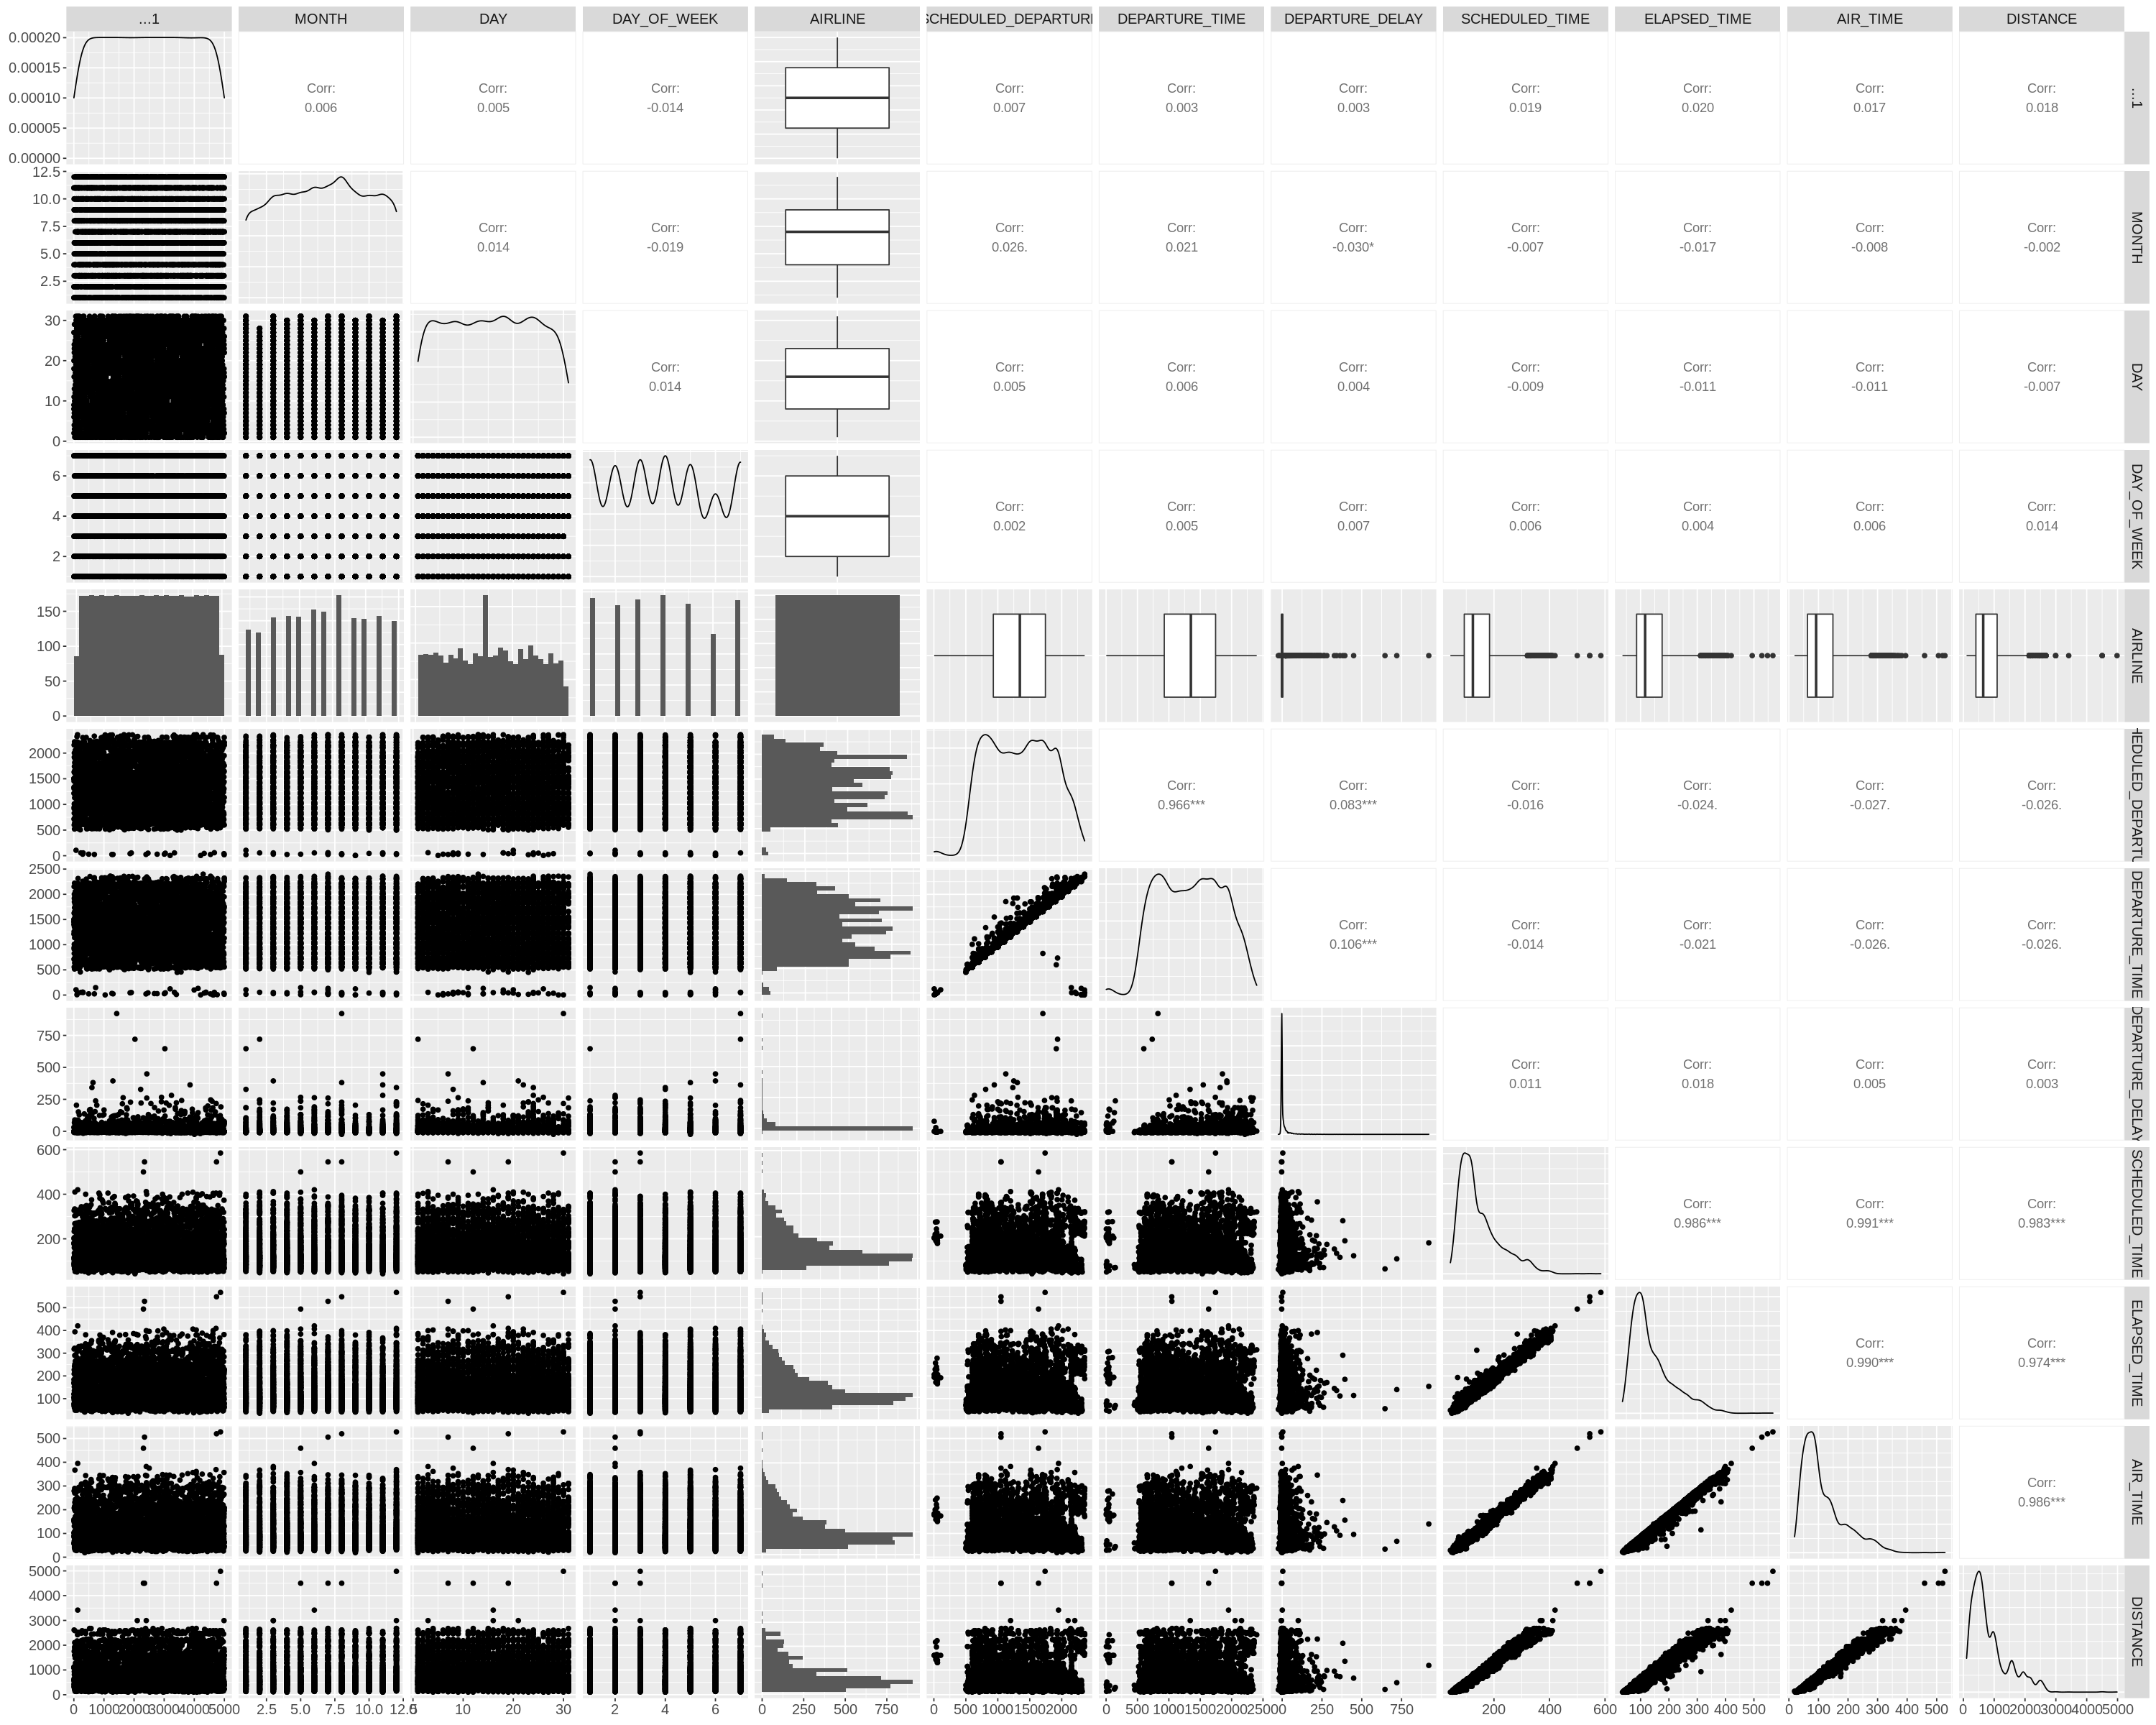

In [113]:
options(repr.plot.width = 25, repr.plot.height = 20)
flight_pair_plots <- flight_data %>%
  select(- ORIGIN_AIRPORT,- DESTINATION_AIRPORT) %>% 
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
CASchools_pair_plots

### Exploratory Data Analysis

* We begin by checking for correlations for the exploratory variables.
* There are too many distinct values in ORIGIN_AIRPORT and DESTINATION_AIRPORT, so I filter out these two categorical variables.
* This will help us diagnose if there is multicollinarity issue in our model.

In [114]:
# In order to analysis the correlation between DEPARTURE_DELAY and the rest continous variables,
# I fliter out all categorical variables.
corr_matrix_flight <- data %>%
  select(- ORIGIN_AIRPORT, - DESTINATION_AIRPORT, -DEPARTURE_DELAY) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

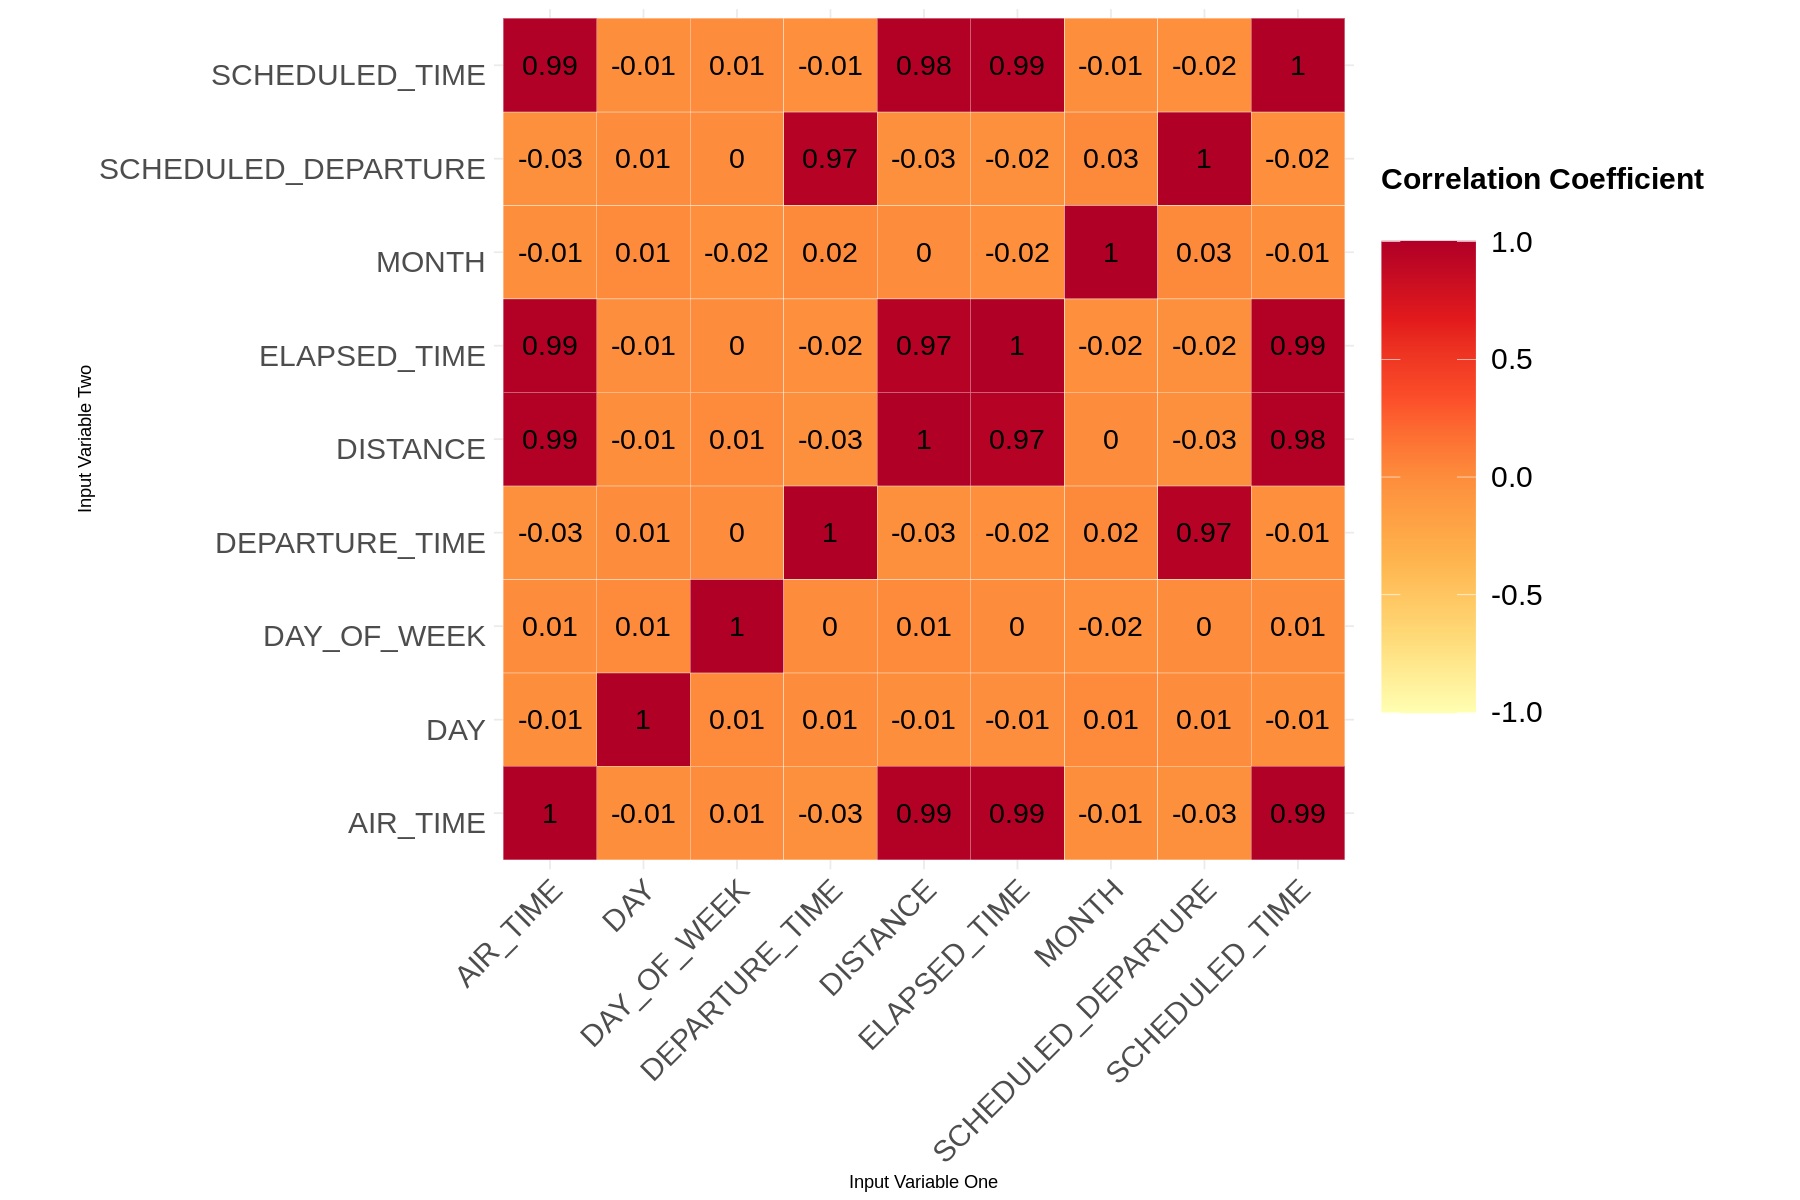

In [115]:
options(repr.plot.width = 15, repr.plot.height = 10)
corr_matrix_flight_plot <- corr_matrix_flight %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Input Variable One", y = "Input Variable Two") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
corr_matrix_flight_plot

In [116]:
model <- lm(DEPARTURE_DELAY ~.,data)

In [117]:
summary(model)


Call:
lm(formula = DEPARTURE_DELAY ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-120.19  -10.90   -4.68    1.45  893.92 

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -16.197262  45.439023  -0.356 0.721512    
MONTH                     -0.002149   0.159031  -0.014 0.989221    
DAY                        0.023624   0.058948   0.401 0.688620    
DAY_OF_WEEK                0.168392   0.258197   0.652 0.514315    
ORIGIN_AIRPORT10397       -5.071197  36.637952  -0.138 0.889920    
ORIGIN_AIRPORT10408        0.397457  50.191193   0.008 0.993682    
ORIGIN_AIRPORT10423        1.590667  40.436019   0.039 0.968623    
ORIGIN_AIRPORT10529       -1.491679  40.650033  -0.037 0.970729    
ORIGIN_AIRPORT10599      -13.776071  50.231102  -0.274 0.783902    
ORIGIN_AIRPORT10620        0.233567  50.531786   0.005 0.996312    
ORIGIN_AIRPORT10627       -2.117991  44.147032  